1.Minimize
2.Maximize
Select your optimization method:1
a is for x coefficient
b is for y coefficient
c is for constant
Enter a,b,c for objective function
a:4
b:1
c:0
Number of constrainsts is always 3
'leq' for less than equal
'geq' for greater than equal
Enter a,b,c,sign for constraint 0
a:3
b:1
c:11
Sign: geq
Enter a,b,c,sign for constraint 1
a:1
b:1
c:5
Sign: geq
Enter a,b,c,sign for constraint 2
a:1
b:0
c:3
Sign: geq
Problem:
MINIMIZE
4*x + 1*y + 0
SUBJECT TO
_C1: 3 x + y >= 11

_C2: x + y >= 5

_C3: x >= 3

VARIABLES
x Continuous
y Continuous

Bounded feasible region
Extreme point: (5.0,0) Value: 20.0
Extreme point: (3.0,2.0) Value: 14.0
Unique Solution
Minimum Solution: x=3.0, y=2.0, value=14.0


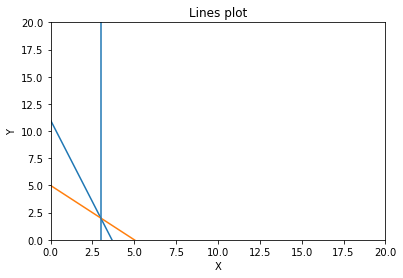

In [10]:
import pulp as p
import matplotlib.pyplot as plt
import numpy as np
def line_intersection(line1, line2):
    xdiff = line2[1]*line1[2]-line1[1]*line2[2]
    ydiff = line2[2]*line1[0]-line1[2]*line2[0]

    div = line1[0]*line2[1]-line1[1]*line2[0]
    if div == 0:
       raise Exception('lines do not intersect')

    x = xdiff / div
    y = ydiff / div
    return [x, y]


x1 = np.linspace(0, 20, 200)
data= []
points=[]
points.append([0,0])
opt=[]
region=""
tos=""
ans=""
ap=[]
print("1.Minimize");
print("2.Maximize");
choice=int(input("Select your optimization method:"));
if choice==1:
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)
    x = p.LpVariable("x", lowBound = 0)
    y = p.LpVariable("y", lowBound = 0) 
    print("a is for x coefficient")
    print("b is for y coefficient")
    print("c is for constant")
    print("Enter a,b,c for objective function")
    a=int(input("a:"))
    b=int(input("b:"))
    c=int(input("c:"))
    Lp_prob += a * x + b * y+ c
    opt.append(a)
    opt.append(b)
    opt.append(c)
    print("Number of constrainsts is always 3")
    print("'leq' for less than equal")
    print("'geq' for greater than equal")
    for counter in range(3):
        temp=[]
        print(f"Enter a,b,c,sign for constraint {counter}")
        a=int(input("a:"))
        temp.append(a)
        b=int(input("b:"))
        temp.append(b)
        c=int(input("c:"))
        temp.append(c)
        sign=input("Sign: ")
        temp.append(sign)
        data.append(temp)
        if a!=0 and b!=0:
            points.append([c/a,0])
            points.append([0,c/b])
        elif b==0:
            points.append([c/a,0])
        elif a==0:
            points.append([0,c/b])

        if sign=='leq':
            Lp_prob += a * x + b * y <=c
        elif sign=='geq':
            Lp_prob += a * x + b * y >=c
        else:
            print("please choose correct sign");
            exit()

    print(Lp_prob) 
    status = Lp_prob.solve()
    if status==1:
        region="Bounded feasible region"
        tos="Unique Solution"
    else:
        region=p.LpStatus[status]
        tos=p.LpSolution[status]
    ap.append(p.value(x))
    ap.append(p.value(y))
    ans=f"Minimum Solution: x={p.value(x)}, y={p.value(y)}, value={p.value(Lp_prob.objective)}"
elif choice==2:
    Lp_prob = p.LpProblem('Problem', p.LpMaximize)
    x = p.LpVariable("x", lowBound = 0)
    y = p.LpVariable("y", lowBound = 0)
    print("a is for x coefficient")
    print("b is for y coefficient")
    print("c is for constant")
    print("Enter a,b,c for objective function")
    a=int(input("a:"))
    b=int(input("b:"))
    c=int(input("c:"))
    opt.append(a)
    opt.append(b)
    opt.append(c)
    Lp_prob += a * x + b * y+ c    
    print("Number of constrainsts is always 3")
    print("'leq' for less than equal")
    print("'geq' for greater than equal")
    for counter in range(3):
        temp=[]
        print(f"Enter a,b,c,sign for constraint {counter}")
        a=int(input("a:"))
        temp.append(a)
        b=int(input("b:"))
        temp.append(b)
        c=int(input("c:"))
        temp.append(c)
        sign=input("Sign: ")
        temp.append(sign)
        data.append(temp)
        
        if a!=0 and b!=0:
            points.append([c/a,0])
            points.append([0,c/b])
        elif b==0:
            points.append([c/a,0])
        elif a==0:
            points.append([0,c/b])

        if sign=='leq':
            Lp_prob += a * x + b * y <=c
        elif sign=='geq':
            Lp_prob += a * x + b * y >=c
        else:
            print("please choose correct sign");
            exit()

    print(Lp_prob) 
    status = Lp_prob.solve()
    if status==1:
        region="Bounded feasible region"
        tos="Unique Solution"
    else:
        region=p.LpStatus[status]
        tos=p.LpSolution[status]
    ap.append(p.value(x))
    ap.append(p.value(y))
    ans=f"Maximum Solution: x={p.value(x)}, y={p.value(y)}, value={p.value(Lp_prob.objective)}"
else:
    print("Please choose correct optimization method!")
    exit()
lines=[]
for temp in data:
    if temp[1]==0:
        con=temp[2]/temp[0]
        plt.axvline(x=con)
        lines.append(con)
    else:
        con=temp[2]/temp[1]-temp[0]*x1/temp[1]
        plt.plot(x1,con)
        lines.append(con)

points.append(line_intersection(data[0],data[1]))
points.append(line_intersection(data[1],data[2]))
points.append(line_intersection(data[2],data[1]))
ext_points=[]
for temp in points:
    line1=data[0]
    line2=data[1]
    line3=data[2]
    t1=False
    t2=False
    t3=False
    if line1[3]=='leq':
        if line1[0]*temp[0]+line1[1]*temp[1] <= line1[2]:
            t1=True
    else:
        if line1[0]*temp[0]+line1[1]*temp[1] >= line1[2]:
            t1=True
    
    if line2[3]=='leq':
        if line2[0]*temp[0]+line2[1]*temp[1] <= line2[2]:
            t2=True
    else:
        if line2[0]*temp[0]+line2[1]*temp[1] >= line2[2]:
            t2=True
    
    if line3[3]=='leq':
        if line3[0]*temp[0]+line3[1]*temp[1] <= line3[2]:
            t3=True
    else:
        if line3[0]*temp[0]+line3[1]*temp[1] >= line3[2]:
            t3=True
    
    if t1 and t2 and t3 and temp[0]>=0 and temp[1]>=0:
        ext_points.append(temp)


# print(points)
# print(ext_points)
new_k = []
for elem in ext_points:
    if elem not in new_k:
        new_k.append(elem)
ext_points = new_k
# print (ext_points)
# plt.fill_between(x1,fr,color='grey')
print(region)
for temp in ext_points:
    print(f"Extreme point: ({temp[0]},{temp[1]}) Value: {opt[0]*temp[0]+opt[1]*temp[1]+opt[2]}")
print(tos)
print(ans)
data.append([1,0,0,'geq'])
data.append([0,1,0,'geq'])
plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Lines plot")
plt.show()